In [1]:
import time
import itertools

import pandas as pd
from simulation_helpers import (one_sim_mode, one_sim_mode_serial, 
                                generate_gaussian_instance_nonlinear_interaction_simple)
from multiprocessing import Pool

from functools import partial

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')


In [11]:
def interaction_filter_vary_mode(nsim=100, use_MLE=True, parallel=True,
                                 ncores=8):
    """
    Compare to R randomized lasso
    """

    # Operating characteristics
    oper_char = {}
    oper_char["coverage rate"] = []
    oper_char["avg length"] = []
    oper_char["method"] = []
    oper_char["F1 score interaction"] = []
    oper_char["|G|"] = []
    oper_char["mode"] = []
    oper_char["SNR"] = []
    p = 30
    SNR = 1
    intercept_flag = True
    
    """
    GOOD RESULT:
    1. 
    p = 30
    SNR = 1
    intercept_flag = True
    ### Partially correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
                           
    2. 
    p = 30
    SNR = 0.5
    intercept_flag = True
    ### Fully correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
    """
    if parallel:
        oper_char_list = []
        
    for mode in ["stronghierarchy", "weakhierarchy", "allpairs"]:  
        if parallel:
            with Pool(ncores) as pool:
                results = pool.map(partial(one_sim_mode, SNR=SNR, 
                                           intercept_flag=intercept_flag,
                                           p=p, use_MLE=use_MLE, mode=mode,
                                           weight_frac=1.5, 
                        inst=generate_gaussian_instance_nonlinear_interaction_simple,
                                           rho=0.5, rho_noise=0.5, full_corr=False),
                                   list(range(nsim)))
            oper_char_list = oper_char_list + results
        else:
            for i in range(nsim):
                print(i, "th simulation for mode:", mode)
                
                one_sim_mode_serial(SNR=SNR, intercept_flag=intercept_flag,
                             p=p, oper_char=oper_char, use_MLE=use_MLE,
                             mode=mode)
    if parallel:
        oper_char_list = list(itertools.chain(*oper_char_list))
        oper_char = pd.DataFrame(oper_char_list)
        oper_char.columns = ["coverage rate","avg length","F1 score interaction",
                             "method", "|G|", "mode", "SNR"]
        return oper_char
    else:
        return pd.DataFrame(oper_char)

In [12]:
# 328s for 8 iters with 8 cores
start = time.time()
oper_char_mode = interaction_filter_vary_mode(8, use_MLE=True, parallel=False)
end = time.time()
print(end-start)

0 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 15
Naive Selection Size: 14
1 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 7
Naive Selection Size: 7
2 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 0
Naive Selection Size: 8
3 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 6
Naive Selection Size: 8
4 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 9
Naive Selection Size: 15
5 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 7
Naive Selection Size: 8
6 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 12
Naive Selection Size: 8
7 th simulation for mode: stronghierarchy
Equally spaced quantile knots used.
DS Selection Size: 12
Naive Selection Size: 6
0 th simula

In [14]:
def interaction_filter_vary_SNR(nsim=100, use_MLE=True, parallel=True,
                                ncores=8):
    """
    Compare to R randomized lasso
    """

    # Operating characteristics
    oper_char = {}
    oper_char["coverage rate"] = []
    oper_char["avg length"] = []
    oper_char["method"] = []
    oper_char["F1 score interaction"] = []
    oper_char["|G|"] = []
    oper_char["mode"] = []
    oper_char["SNR"] = []
    
    p = 30
    mode = 'weakhierarchy'
    intercept_flag = True
    
    """
    GOOD RESULT:
    1. 
    p = 30
    SNR = 1
    intercept_flag = True
    ### Partially correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
                           
    2. 
    p = 30
    SNR = 0.5
    intercept_flag = True
    ### Fully correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
    """
    if parallel:
        oper_char_list = []
        
    for SNR in [0.1, 0.5, 1, 2]:  
        if parallel:
            with Pool(ncores) as pool:
                results = pool.map(partial(one_sim_mode, SNR=SNR, 
                                           intercept_flag=intercept_flag,
                                           p=p, use_MLE=use_MLE, mode=mode,
                                           weight_frac=1.5, 
                        inst=generate_gaussian_instance_nonlinear_interaction_simple,
                                           rho=0.5, rho_noise=0.5, full_corr=False),
                                   list(range(nsim)))
            oper_char_list = oper_char_list + results
        else:
            for i in range(nsim):
                print(i, "th simulation for mode:", mode)
                
                one_sim_mode_serial(SNR=SNR, intercept_flag=intercept_flag,
                             p=p, oper_char=oper_char, use_MLE=use_MLE,
                             mode=mode)
    if parallel:
        oper_char_list = list(itertools.chain(*oper_char_list))
        oper_char = pd.DataFrame(oper_char_list)
        oper_char.columns = ["coverage rate","avg length","F1 score interaction",
                             "method", "|G|", "mode", "SNR"]
        return oper_char
    else:
        return pd.DataFrame(oper_char)

In [15]:
oper_char_SNR = interaction_filter_vary_SNR(8, use_MLE=True, parallel=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 19
Naive Selection Size: 9
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 21
Naive Selection Size: 11
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 31
Naive Selection Size: 25
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 12
Naive Selection Size: 7
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantil

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 55
Naive Selection Size: 23
Equally spaced quantile knots used.
DS Selection Size: 26
Naive Selection Size: 23
Equally spaced quantile knots used.
DS Selection Size: 43
Naive Selection Size: 39
Equally spaced quantile knots used.
DS Selection Size: 32
Naive Selection Size: 29
Equally spaced quantile knots used.
DS Selection Size: 44
Naive Selection Size: 23
Equally spaced quantile knots used.
DS Selection Size: 27
Naive Selection Size: 28
Equally spaced quantile knots used.
DS Selection Size: 59
Naive Selection Size: 42
Equally spaced quantile knots used.
DS Selection Size: 85
Naive Selection Size: 65


/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 48
Naive Selection Size: 39
Equally spaced quantile knots used.
DS Selection Size: 37
Naive Selection Size: 49
Equally spaced quantile knots used.
DS Selection Size: 40
Naive Selection Size: 38
Equally spaced quantile knots used.
DS Selection Size: 63
Naive Selection Size: 64
Equally spaced quantile knots used.
DS Selection Size: 30
Naive Selection Size: 51
Equally spaced quantile knots used.
DS Selection Size: 38
Naive Selection Size: 66
Equally spaced quantile knots used.
DS Selection Size: 92
Naive Selection Size: 89


/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 70
Naive Selection Size: 72
Equally spaced quantile knots used.
DS Selection Size: 58
Naive Selection Size: 76
Equally spaced quantile knots used.
DS Selection Size: 56
Naive Selection Size: 55
Equally spaced quantile knots used.
DS Selection Size: 52
Naive Selection Size: 94
Equally spaced quantile knots used.
DS Selection Size: 118
Naive Selection Size: 87
Equally spaced quantile knots used.
DS Selection Size: 51
Naive Selection Size: 85
Equally spaced quantile knots used.
DS Selection Size: 106
Naive Selection Size: 109


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
def plotting(oper_char_df, x_axis='p', hue='method'):
    oper_char_df_copy = oper_char_df.copy()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

    # print("Mean coverage rate/length:")
    # print(oper_char_df.groupby([x_axis, hue]).mean())
    my_palette = {"MLE": "#48c072",
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}

    alias = {"stronghierarchy": "Strong",
             "weakhierarchy": "Weak",
             "allpairs": "All"}
    if x_axis == 'mode':
        oper_char_df_copy['mode'] = oper_char_df_copy['mode'].map(alias)

    cov_plot = sns.boxplot(y=oper_char_df_copy["coverage rate"],
                           x=oper_char_df_copy[x_axis],
                           hue=oper_char_df_copy[hue],
                           palette=my_palette,
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    # plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    # ax1.set_ylabel("")  # remove y label, but keep ticks
    ax1.set_xlabel(x_axis)

    len_plot = sns.boxplot(y=oper_char_df_copy["avg length"],
                           x=oper_char_df_copy[x_axis],
                           hue=oper_char_df_copy[hue],
                           palette=my_palette,
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks
    ax2.set_xlabel(x_axis)

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.15)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df_copy["F1 score interaction"],
                          x=oper_char_df_copy[x_axis],
                          hue=oper_char_df_copy[hue],
                          palette=my_palette,
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    ax3.set_xlabel(x_axis)

    size_plot = sns.boxplot(y=oper_char_df_copy["|G|"],
                            x=oper_char_df_copy[x_axis],
                            hue=oper_char_df_copy[hue],
                            palette=my_palette,
                            orient="v", ax=ax4,
                            linewidth=1)
    size_plot.set(title='|G|')
    ax4.set_xlabel(x_axis)

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    size_plot.legend_.remove()

    # plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.25, hspace=0.2)
    plt.show()

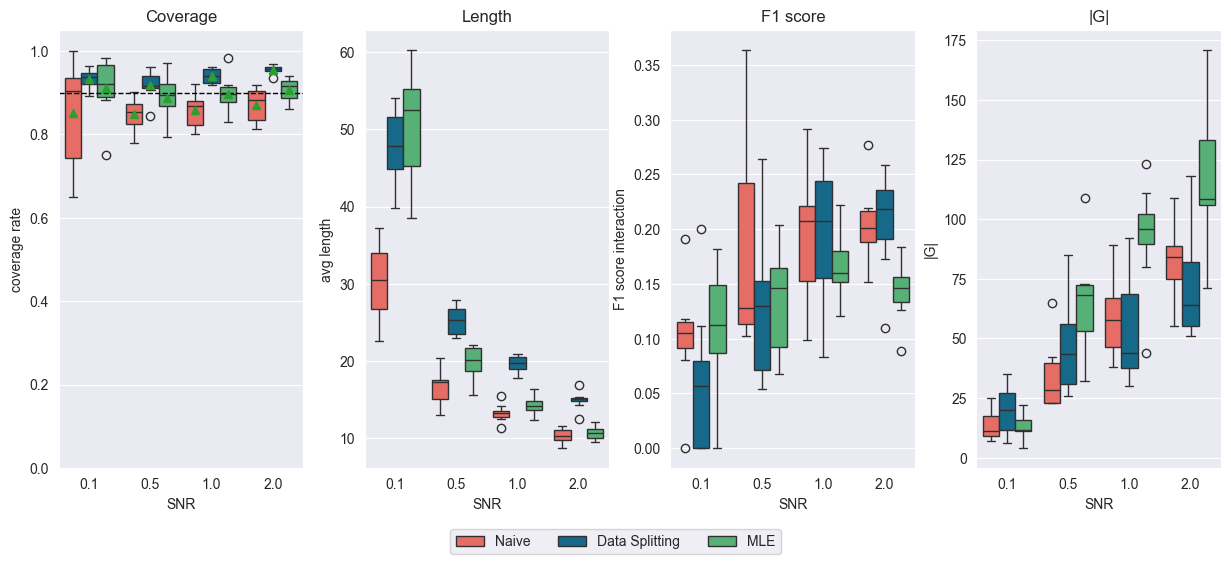

In [16]:
plotting(oper_char_df=oper_char_SNR,
         x_axis="SNR",
         hue="method")

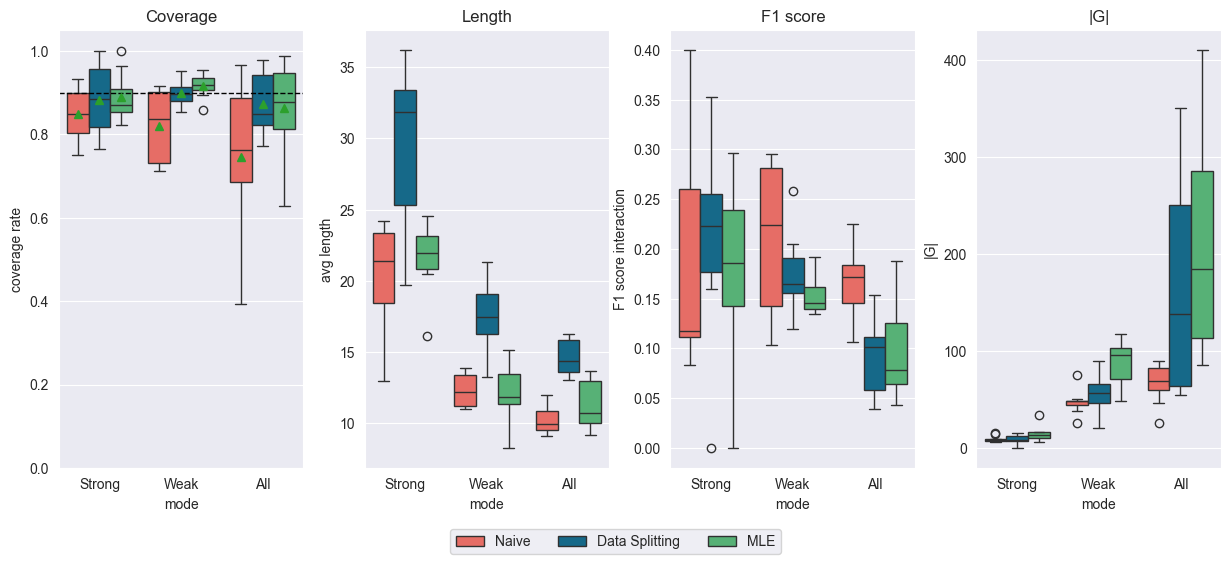

In [13]:
plotting(oper_char_df=oper_char_mode,
         x_axis="mode",
         hue="method")